In [568]:
import pandas as pd
import re
import numpy as np
import time
from datetime import date
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import plotly.express as px
import nltk


In [864]:
tweets = pd.read_csv('Tweet.csv')
company_tweet = pd.read_csv('Company_Tweet.csv')
result = pd.read_csv('result.csv')
stock = pd.read_csv('CompanyValues.csv')
train_df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1",names=['target','ids','date','flag','user','text'])
reaction = pd.read_csv('reaction.csv')

TRAINING- SENTIMENT ANALYSIS

In [570]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 
             're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [571]:
STOPWORDS = set(stopwordlist)
def stopword_remover(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweets['body'] = tweets['body'].apply(lambda text: stopword_remover(text))
tweets['body'].head()

0    lx21 made $10,008 $AAPL -Check out! http://pro...
1    Insanity today weirdo massive selling. $aapl b...
2    S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3    $GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4    Swing Trading: Up To 8.91% Return In 14 Days h...
Name: body, dtype: object

In [572]:
import string
eng_punct = string.punctuation
punct_list = eng_punct
def clean_punct(text):
    translator = str.maketrans('', '', punct_list)
    return text.translate(translator)
tweets['body']= tweets['body'].apply(lambda x: clean_punct(x))
tweets['body'].head()

0    lx21 made 10008 AAPL Check out httpprofitly1Mn...
1    Insanity today weirdo massive selling aapl bid...
2    SP100 Stocks Performance HD LOW SBUX TGT DVN I...
3    GM TSLA Volkswagen Pushes 2014 Record Recall T...
4    Swing Trading Up To 891 Return In 14 Days http...
Name: body, dtype: object

In [573]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)
tweets['body'] = tweets['body'].apply(lambda x: cleaning_repeating_char(x))
tweets['body'].tail()

3717959    That SPY SPX pump last hour EOY EOQ EOM top wi...
3717960    In 2020 I may start Tweeting positive news XOM...
3717961    Patiently Waiting no twitter sitter tweets tsl...
3717962                      I dont discriminate I aapl msft
3717963    AAPL patent 10522475 Vertical interconnects se...
Name: body, dtype: object

In [574]:
def cleaning_URLs(datas):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',datas)
tweets['body'] = tweets['body'].apply(lambda x: cleaning_URLs(x))
tweets['body'].tail()

3717959    That SPY SPX pump last hour EOY EOQ EOM top wi...
3717960    In 2020 I may start Tweeting positive news XOM...
3717961    Patiently Waiting no twitter sitter tweets tsl...
3717962                      I dont discriminate I aapl msft
3717963    AAPL patent 10522475 Vertical interconnects se...
Name: body, dtype: object

In [575]:
def cleaning_numbers(datas):
    return re.sub('[0-9]+', '', datas)
tweets['body'] = tweets['body'].apply(lambda x: cleaning_numbers(x))
tweets['body'].tail()

3717959    That SPY SPX pump last hour EOY EOQ EOM top wi...
3717960    In  I may start Tweeting positive news XOM CVX...
3717961    Patiently Waiting no twitter sitter tweets tsl...
3717962                      I dont discriminate I aapl msft
3717963    AAPL patent  Vertical interconnects self shiel...
Name: body, dtype: object

Visulation of Targets

TWEETS

In [865]:
tweets.head()


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [866]:
tweets.tail()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1
3717963,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0


In [578]:
print(tweets.shape)

(3717964, 7)


In [579]:
tweets.info()
print(tweets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB
           tweet_id     post_date   comment_num   retweet_num      like_num
count  3.717964e+06  3.717964e+06  3.717964e+06  3.717964e+06  3.717964e+06
mean   8.797444e+17  1.498582e+09  3.123642e-01  6.214807e-01  2.219982e+00
std    1.924039e+17  4.587266e+07  1.966064e+00  7.009571e+00  1.429093e+01
min    5.504415e+17  1.420070e+09  0.000000e+00  0.000000e+00  0.000000e+00
25%    7.169886e+17  1.459778e+09  0.000000e+00  0.000000e+00  0.000000e+00
50%    8.743180e+17  1.497289e+09  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.050771e+18  1.539358e+09  0.000000e+00  0.000000e+00  1.000000e+00
max

COMPANIES

In [580]:
companies = result['ticker_symbol'].unique()
print(companies)
company_df = pd.DataFrame({'company': companies})

['AAPL' 'AMZN' 'TSLA' 'MSFT' 'GOOG' 'GOOGL']


In [581]:
company_df.head()

,company
0,AAPL
1,AMZN
2,TSLA
3,MSFT
4,GOOG


RESULT

In [867]:
result.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
0,0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,Neutral
1,1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,Negative
2,2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Negative
3,3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,Neutral
4,4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,Neutral


In [868]:
result.tail()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
4336440,4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,Negative
4336441,4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,Negative
4336442,4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,Neutral
4336443,4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,Neutral
4336444,4336444,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,Neutral


In [869]:
print(result.shape)

(4336445, 10)


In [870]:
result.describe()

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num
count,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06
mean,2.168222e+06,8.834282e+17,1.499461e+09,2.923863e-01,6.347647e-01,2.103625e+00
std,1.251824e+06,1.927735e+17,4.596080e+07,1.885788e+00,6.986371e+00,1.371744e+01
min,0.000000e+00,5.504415e+17,1.420070e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.084111e+06,7.185450e+17,1.460149e+09,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.168222e+06,8.825934e+17,1.499262e+09,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.252333e+06,1.054776e+18,1.540313e+09,0.000000e+00,0.000000e+00,1.000000e+00
max,4.336444e+06,1.212160e+18,1.577837e+09,6.310000e+02,9.990000e+02,9.990000e+02


In [871]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   tweet_id       int64 
 2   writer         object
 3   post_date      int64 
 4   body           object
 5   comment_num    int64 
 6   retweet_num    int64 
 7   like_num       int64 
 8   ticker_symbol  object
 9   reaction       object
dtypes: int64(6), object(4)
memory usage: 330.8+ MB


In [872]:
result = result.replace('Negative', -1)
result = result.replace('Neutral', 0)
result = result.replace('Positive', 1)

In [873]:
result.head(10)

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
0,0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0
1,1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1
2,2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1
3,3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0
4,4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0
5,5,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0
6,6,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0
7,7,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0
8,8,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0
9,9,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0


In [874]:
dates = []
def toDate(num):
    temp = datetime.fromtimestamp(int(num))
    dates.append(temp)


In [875]:
for date in result['post_date']:
    toDate(date)

In [876]:
result['date'] = dates

In [877]:
result['date'] = pd.to_datetime(result['date']).dt.date

In [880]:
result.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


In [881]:
result = result.drop(['Unnamed: 0'], axis=1)

In [882]:
result = result.drop(['post_date'], axis=1)

In [883]:
result.head()

,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,550441672312512512,KeralaGuy77,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,550441732014223360,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,550442977802207232,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,550443807834402816,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


In [884]:
result.isnull().values.any()


True

In [885]:
result.isnull().sum().sum()

55919

[Text(0.5, 1.0, 'Missing Data')]

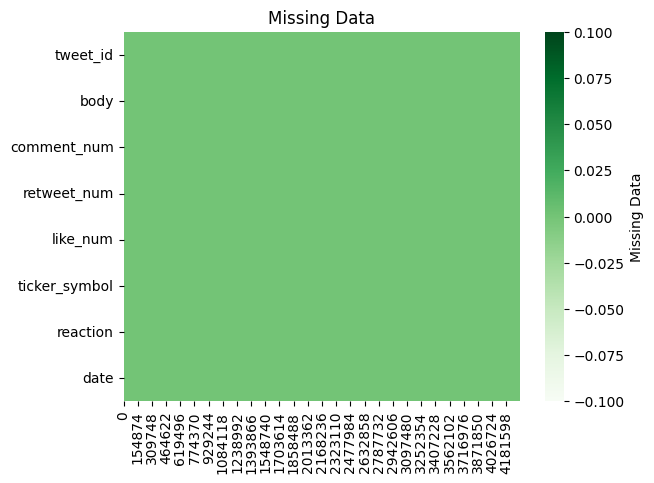

In [1058]:
# plt.figure(figsize=(10,6))
sns.heatmap(result.isna().transpose(),
            cmap="Greens",
            cbar_kws={'label': 'Missing Data'}).set(title="Missing Data")

In [887]:
result['writer'] = result['writer'].fillna("Unknown Author")

In [888]:
result['writer'].isnull().values.any()

False

In [1053]:
plt.figure(figsize=(10,6))
sns.heatmap(result.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title='Missing Data')

TypeError: 'Figure' object is not callable

NUMBER OF TWEETS RELATING TO EACH COMPANY

In [890]:
num_tweets_company = result.groupby(result['ticker_symbol'].tolist(), as_index=False).size()

In [891]:
num_tweets_company.head()

,index,size
0,AAPL,1425013
1,AMZN,718715
2,GOOG,392569
3,GOOGL,327569
4,MSFT,375711


Text(0.5, 1.0, 'Number of tweets releated to companies')

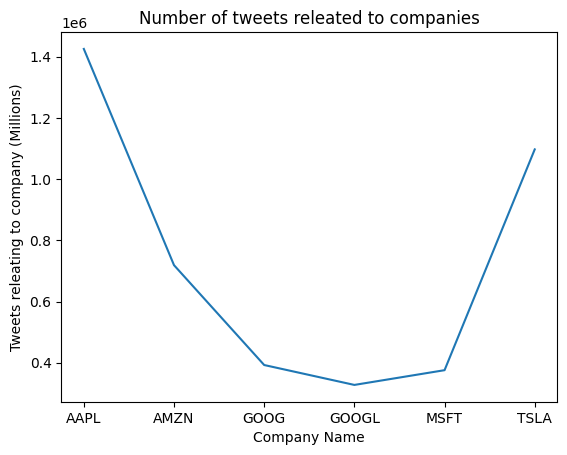

In [892]:
plt.plot( num_tweets_company['index'], num_tweets_company['size'])
plt.ylabel('Tweets releating to company (Millions)')
plt.xlabel('Company Name')
plt.title('Number of tweets releated to companies')

In [1035]:
company_tweet_likes = []
company_tweet_retweet = []
company_tweet_comment = []
for name in companies:
    company_tweet_comment.append(result.loc[result['ticker_symbol'] == name, 'comment_num'].sum())
    company_tweet_likes.append(result.loc[result['ticker_symbol'] == name, 'like_num'].sum())
    company_tweet_retweet.append(result.loc[result['ticker_symbol'] == name, 'retweet_num'].sum())
print('Likes per company',company_tweet_likes)
print('Retweets per company',company_tweet_retweet)
print('Comments per company',company_tweet_comment)

Likes per company [1378670, 984166, 5769051, 347520, 235928, 406917]
Retweets per company [722396, 419783, 1078386, 193364, 147143, 191550]
Comments per company [222048, 152200, 762813, 41533, 30704, 58619]


In [1041]:
data = [['Likes', 1378670,984166, 5769051, 347520, 235928, 406917 ],
        ['Retweets',722396, 419783, 1078386, 193364, 147143, 191550 ],
        ['Comments', 222048, 152200, 762813, 41533, 30704, 58619]]
df_info = pd.DataFrame(data, columns =['reaction', 'AAPL', 'AMZN', 'TSLA', 'MSFT', 'GOOG', 'GOOGL'])
df_info

,reaction,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
0,Likes,1378670,984166,5769051,347520,235928,406917
1,Retweets,722396,419783,1078386,193364,147143,191550
2,Comments,222048,152200,762813,41533,30704,58619


In [1036]:
result.head()

,tweet_id,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,550441672312512512,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,550441732014223360,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,550442977802207232,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


In [1049]:
long_df = px.data.medals_long()

fig = px.bar(df_info, x="reaction", y=['AAPL', 'AMZN', 'TSLA', 'MSFT', 'GOOG', 'GOOGL'], title="Long-Form Input",width=800, height=800, color_discrete_sequence=["#76B947", "#B1D8B7", "#2F5233", "#94C973", "#08313A", '#32CD30'] )
fig.show()

Text(0, 0.5, 'Number of likes (Millions)')

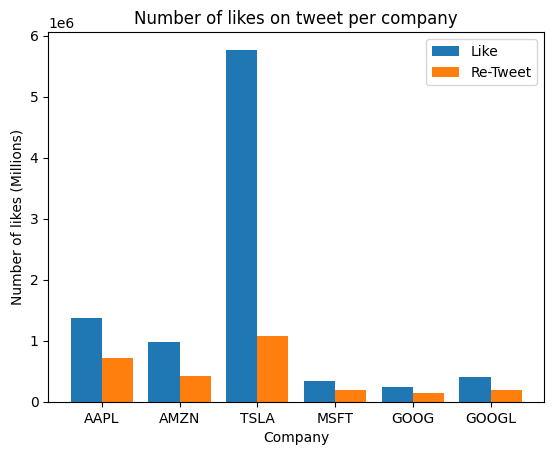

In [894]:
X_axis = np.arange(len(companies))
plt.bar(X_axis-0.2 ,company_tweet_likes,0.4, label = 'Like')
plt.bar(X_axis+0.2 ,company_tweet_retweet,0.4, label = 'Re-Tweet')

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])


plt.xticks(X_axis, companies)
plt.legend()
plt.title('Number of likes on tweet per company')
plt.xlabel('Company')

plt.ylabel('Number of likes (Millions)')

In [895]:
result = result.drop('writer', axis=1)


In [896]:
result.head()

,tweet_id,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,550441672312512512,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,550441732014223360,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,550442977802207232,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


In [897]:
result.tail()

,tweet_id,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
4336440,1212159838882533376,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,-1,2019-12-31
4336441,1212160015332728833,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,-1,2019-12-31
4336442,1212160410692046849,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,0,2019-12-31
4336443,1212160410692046849,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,0,2019-12-31
4336444,1212160477159206912,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,0,2019-12-31


In [902]:
# df = (result.loc[(result['date'] >= datetime(2018, 1, 1).date()) & (result['date'] <= datetime(2020, 1, 1).date())])
df = result
df.tail()
df_reduce = df
df_reduce = df_reduce.drop('tweet_id', axis=1)
df_reduce = df_reduce.drop('comment_num', axis=1)
df_reduce = df_reduce.drop('retweet_num', axis=1)
df_reduce = df_reduce.drop('like_num', axis=1)

In [903]:
df_reduce = df_reduce.loc[df_reduce['ticker_symbol'] == 'AMZN']

In [905]:
df_reduce.head(20)

,body,ticker_symbol,reaction,date
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AMZN,-1,2015-01-01
27,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,AMZN,1,2015-01-01
37,RT @SeekingAlpha: A Look At BlackBerry's Deals...,AMZN,0,2015-01-01
38,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN,-1,2015-01-01
39,Jeff Bezos lost $7.4 billion in #Amazon worst ...,AMZN,-1,2015-01-01
40,Ouch. RT @WSJ: Jeff Bezos lost $7.4 billion in...,AMZN,-1,2015-01-01
41,And I bet he has billions more! “@WSJ: Jeff Be...,AMZN,-1,2015-01-01
42,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN,-1,2015-01-01
45,Want alerts for momentum stocks about to run? ...,AMZN,1,2015-01-01
48,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN,-1,2015-01-01


In [1027]:
body_len = df_reduce['body'].str.split().str.len()
body_len.describe()

count    718715.000000
mean         18.323782
std           9.899799
min           1.000000
25%          12.000000
50%          16.000000
75%          22.000000
max          63.000000
Name: body, dtype: float64

<Axes: >

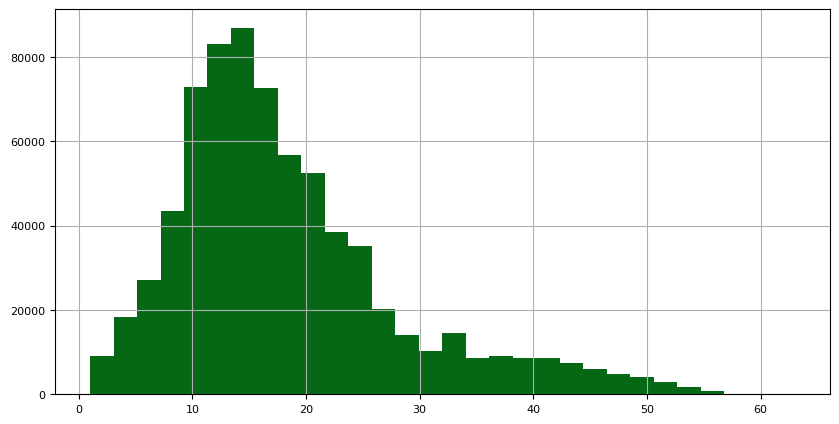

In [1055]:
body_len.hist(figsize=(10, 5), bins=30, xlabelsize=8, ylabelsize=8, color= "#066715")





In [908]:
df_reduce = df_reduce.reset_index(drop=True)
df_reduce.to_csv('data.csv', index=False)

In [909]:
df_reduce.shape

(718715, 4)

In [910]:
unique_days = df_reduce['date'].unique()
print(len(unique_days))

1826


In [911]:
data = {'date': [0],'AMZN': 0 }
df_sum= pd.DataFrame(data)
df_sum.head()


,date,AMZN
0,0,0


In [912]:
days = df_reduce['date'].unique()
print(date)
for date in days:
    
    AMZN = ((result.loc[(result['ticker_symbol'] == 'AMZN' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'AMZN' )& (result['date'] == date)])))
    data = {'date': [date],'AMZN': AMZN }
    df_sum = df_sum.append(data, ignore_index=True)

1577836553


/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/279423811.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/279423811.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/279423811.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/279423811.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/279423811.py:7: FutureWarning:

The frame.append method is deprecated and wi

In [915]:
df_sum.head()

,date,AMZN
0,0,0.000000
1,[2015-01-01],-0.145038
2,[2015-01-02],0.241379
3,[2015-01-03],0.298507
4,[2015-01-04],0.223529


In [916]:
df_sum = df_sum.drop(0)



In [917]:
df_sum = df_sum.reset_index(drop=True)

In [918]:
df_sum.head()

,date,AMZN
0,[2015-01-01],-0.145038
1,[2015-01-02],0.241379
2,[2015-01-03],0.298507
3,[2015-01-04],0.223529
4,[2015-01-05],0.323843


In [919]:
# df_sum.to_csv('year.csv', index=False)

In [920]:
reaction.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"[datetime.date(2015, 1, 1)]",0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,"[datetime.date(2015, 1, 2)]",0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,"[datetime.date(2015, 1, 3)]",0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,"[datetime.date(2015, 1, 4)]",0.389163,0.223529,0.210526,0.411765,0.495283,0.857143


In [624]:
reaction = reaction.drop(0, index=)


In [625]:
reaction.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1,"[datetime.date(2015, 1, 1)]",0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,"[datetime.date(2015, 1, 2)]",0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,"[datetime.date(2015, 1, 3)]",0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,"[datetime.date(2015, 1, 4)]",0.389163,0.223529,0.210526,0.411765,0.495283,0.857143
5,"[datetime.date(2015, 1, 5)]",0.223191,0.323843,0.287770,0.151786,0.404682,0.610390


In [626]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 1 to 1826
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1826 non-null   object 
 1   AAPL    1823 non-null   float64
 2   AMZN    1826 non-null   float64
 3   TSLA    1826 non-null   float64
 4   MSFT    1826 non-null   float64
 5   GOOG    1825 non-null   float64
 6   GOOGL   1826 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


In [973]:
stocks = pd.read_csv('stocks.csv')

In [974]:

stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200
1,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
2,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302
3,MSFT,2010-06-01,25.8900,76120800,25.5300,26.3100,25.5200
4,GOOGL,2010-06-02,249.2233,2513109,245.8439,249.4759,243.2071


[Text(0.5, 1.0, 'Missing Data')]

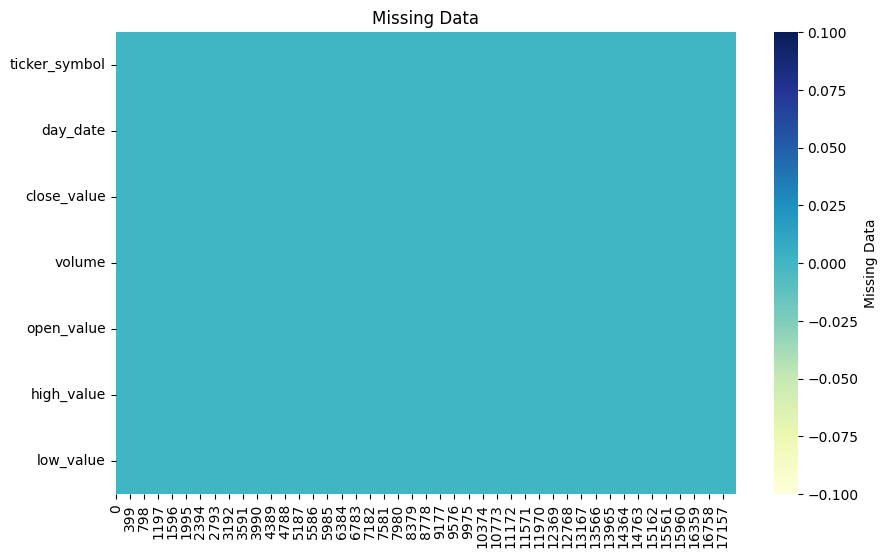

In [343]:
plt.figure(figsize=(10,6))
sns.heatmap(stocks.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title='Missing Data')

In [655]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB


In [925]:
print(stocks.shape)

(17528, 7)


In [657]:
stocks.describe()

,close_value,volume,open_value,high_value,low_value
count,17528.000000,1.752800e+04,17528.000000,17528.000000,17528.000000
mean,455.167040,2.025441e+07,455.314451,459.710597,450.466694
std,469.324583,3.322733e+07,469.588291,473.771691,464.794791
min,15.800000,7.932000e+03,16.140000,16.630000,14.980000
25%,100.300000,2.075086e+06,99.883750,100.927500,98.940000
50%,256.500000,4.835618e+06,256.095000,259.604500,252.177400
75%,735.630000,2.704358e+07,735.740000,742.000000,728.920025
max,2497.940000,4.624423e+08,2500.000000,2525.450000,2467.270000


In [975]:
stocks = stocks.loc[5954:]

In [976]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
5954,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45
5955,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
5956,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
5957,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
5958,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [977]:
stocks = stocks.reset_index(drop=True)

In [978]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45
1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
2,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
3,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
4,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [979]:

stocks.shape

(11574, 7)

In [980]:
stocks = stocks.loc[stocks['ticker_symbol'] == 'AMZN']

stocks = stocks.reset_index(drop=True)

In [981]:
stocks.iloc[1825]

ticker_symbol          AMZN
day_date         2019-12-31
close_value         1847.84
volume              2510380
open_value           1842.0
high_value          1853.26
low_value           1832.23
Name: 1825, dtype: object

In [982]:
stocks = stocks.loc[:1825]

In [983]:
stocks.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
1821,AMZN,2019-12-27,1869.80,6188754,1882.92,1901.40,1866.01
1822,AMZN,2019-12-28,1869.80,6188754,1882.92,1901.40,1866.01
1823,AMZN,2019-12-29,1869.80,6188754,1882.92,1901.40,1866.01
1824,AMZN,2019-12-30,1846.89,3677306,1874.00,1884.00,1840.62
1825,AMZN,2019-12-31,1847.84,2510380,1842.00,1853.26,1832.23


/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/2887538280.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


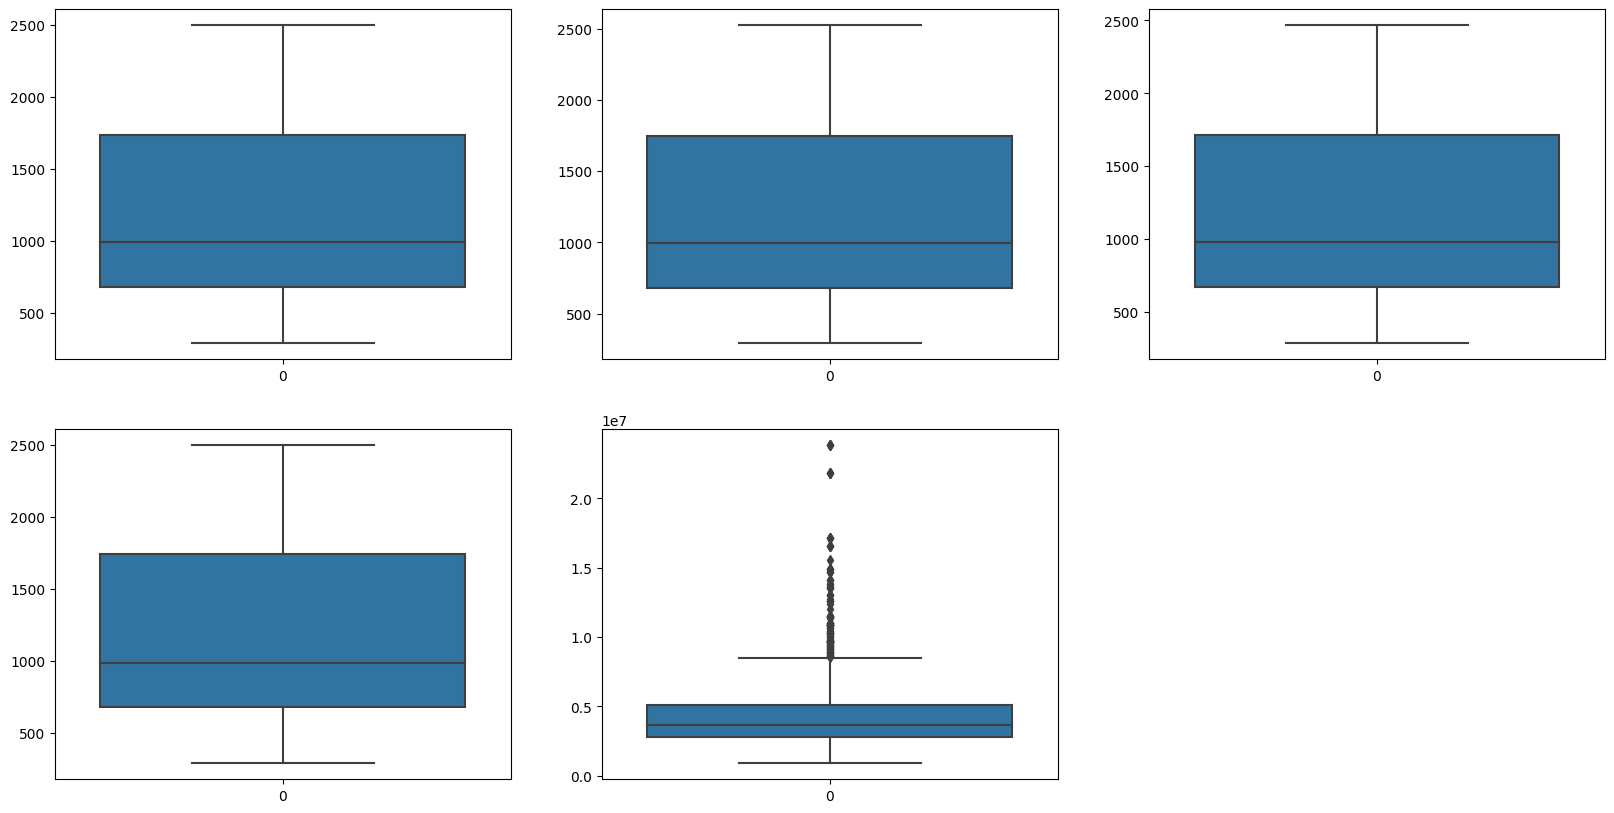

In [354]:
features = ['open_value', 'high_value', 'low_value', 'close_value', 'volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(stocks[col])
plt.show()

In [398]:
vals = stocks['open_value', 'close_value']
print(vals)

KeyError: ('open_value', 'close_value')

In [984]:
stocks1 = stocks
stocks1 = stocks1.drop('day_date', axis=1)


In [985]:
stocks1 = stocks1.drop('ticker_symbol', axis = 1)

In [986]:
stocks1.head()

,close_value,volume,open_value,high_value,low_value
0,310.35,2048676,311.55,312.98,310.0100
1,308.52,2785167,312.58,314.75,306.9601
2,308.52,2785167,312.58,314.75,306.9601
3,308.52,2785167,312.58,314.75,306.9601
4,302.19,2768215,307.01,308.38,300.8500


/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/3528010614.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



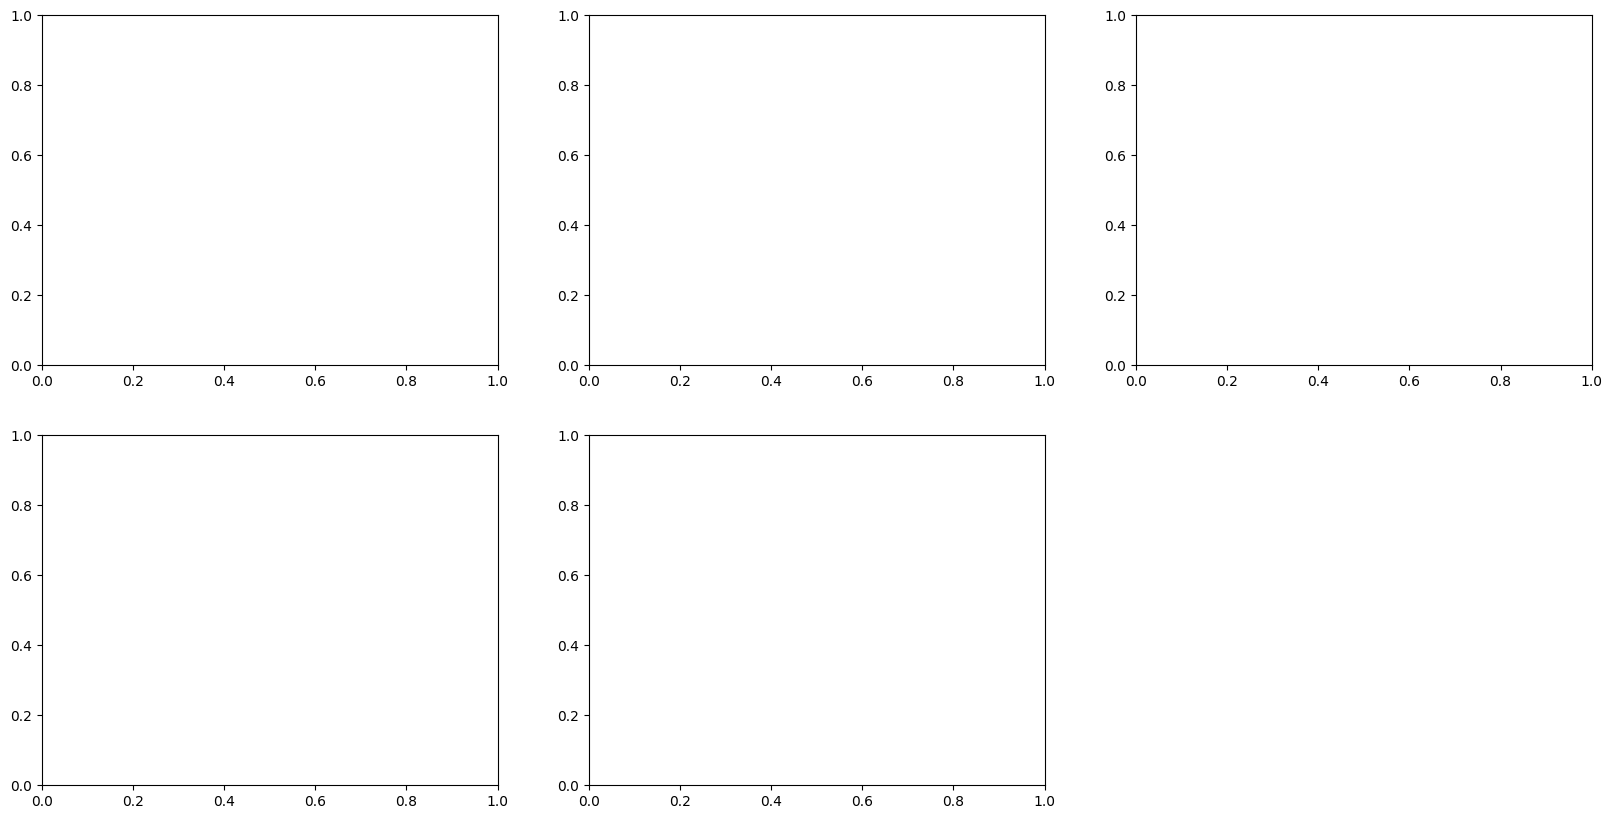

In [419]:
features = ['open_value', 'high_value', 'low_value', 'close_value', 'volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  px.box(stocks[col])
plt.show()

In [421]:
stocks1 = stocks1.drop('volume', axis = 1)
fig = px.box(stocks1)
fig.show()

In [ ]:

fig = px.box(stocks1)
fig.show()

In [987]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.0100
1,AMZN,2015-01-02,308.52,2785167,312.58,314.75,306.9601
2,AMZN,2015-01-03,308.52,2785167,312.58,314.75,306.9601
3,AMZN,2015-01-04,308.52,2785167,312.58,314.75,306.9601
4,AMZN,2015-01-05,302.19,2768215,307.01,308.38,300.8500


In [988]:
# stocks = (stocks.loc[(stocks['day_date'] >= datetime(2018, 1, 1)) & (stocks['day_date'] <= datetime(2019, 1, 1))])
stocks.loc[1096]
# 1096

ticker_symbol          AMZN
day_date         2018-01-01
close_value         1169.47
volume              2678122
open_value          1182.35
high_value           1184.0
low_value            1167.5
Name: 1096, dtype: object

In [989]:
stocks.loc[1825]


ticker_symbol          AMZN
day_date         2019-12-31
close_value         1847.84
volume              2510380
open_value           1842.0
high_value          1853.26
low_value           1832.23
Name: 1825, dtype: object

In [666]:
# stocks = stocks.loc[1096:1825]
# 1491

In [990]:
stocks.tail()


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
1821,AMZN,2019-12-27,1869.80,6188754,1882.92,1901.40,1866.01
1822,AMZN,2019-12-28,1869.80,6188754,1882.92,1901.40,1866.01
1823,AMZN,2019-12-29,1869.80,6188754,1882.92,1901.40,1866.01
1824,AMZN,2019-12-30,1846.89,3677306,1874.00,1884.00,1840.62
1825,AMZN,2019-12-31,1847.84,2510380,1842.00,1853.26,1832.23


In [991]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.0100
1,AMZN,2015-01-02,308.52,2785167,312.58,314.75,306.9601
2,AMZN,2015-01-03,308.52,2785167,312.58,314.75,306.9601
3,AMZN,2015-01-04,308.52,2785167,312.58,314.75,306.9601
4,AMZN,2015-01-05,302.19,2768215,307.01,308.38,300.8500


In [668]:
stocks = stocks.reset_index(drop=True)
# stocks = stocks.drop('volume', axis=1)
# stocks = stocks.drop('low_value', axis=1)
# stocks = stocks.drop('high_value', axis=1)



In [669]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2018-01-01,1169.47,2678122,1182.35,1184.0000,1167.50
1,AMZN,2018-01-02,1189.01,2673958,1172.00,1190.0000,1170.51
2,AMZN,2018-01-03,1204.20,3094175,1188.30,1205.4900,1188.30
3,AMZN,2018-01-04,1209.59,3015997,1205.00,1215.8699,1204.66
4,AMZN,2018-01-05,1229.14,3536299,1217.51,1229.1400,1210.00


In [670]:
stocks

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2018-01-01,1169.47,2678122,1182.35,1184.0000,1167.50
1,AMZN,2018-01-02,1189.01,2673958,1172.00,1190.0000,1170.51
2,AMZN,2018-01-03,1204.20,3094175,1188.30,1205.4900,1188.30
3,AMZN,2018-01-04,1209.59,3015997,1205.00,1215.8699,1204.66
4,AMZN,2018-01-05,1229.14,3536299,1217.51,1229.1400,1210.00
...,...,...,...,...,...,...,...
725,AMZN,2019-12-27,1869.80,6188754,1882.92,1901.4000,1866.01
726,AMZN,2019-12-28,1869.80,6188754,1882.92,1901.4000,1866.01
727,AMZN,2019-12-29,1869.80,6188754,1882.92,1901.4000,1866.01
728,AMZN,2019-12-30,1846.89,3677306,1874.00,1884.0000,1840.62


In [671]:
df_sum

,date,AMZN
0,[2018-01-01],0.522059
1,[2018-01-02],0.428862
2,[2018-01-03],0.335366
3,[2018-01-04],0.397436
4,[2018-01-05],0.395387
...,...,...
725,[2019-12-27],0.407563
726,[2019-12-28],0.411765
727,[2019-12-29],0.447368
728,[2019-12-30],0.424474


In [992]:
sentiments = []
for val in df_sum['AMZN']:
    sentiments.append(val)
    # stocks['sentiment'] = val
print((sentiments))
stocks['sentiment'] = sentiments

[-0.1450381679389313, 0.2413793103448276, 0.29850746268656714, 0.2235294117647059, 0.3238434163701068, 0.3058252427184466, 0.15463917525773196, 0.21395348837209302, 0.25853658536585367, 0.12280701754385964, 0.21153846153846154, 0.2565217391304348, 0.3026634382566586, 0.23591549295774647, 0.20357142857142857, 0.18012422360248448, 0.031914893617021274, 0.14864864864864866, 0.37815126050420167, 0.41409691629955947, 0.3472222222222222, 0.1801470588235294, 0.21804511278195488, 0.16806722689075632, 0.2222222222222222, 0.2857142857142857, 0.2388663967611336, 0.3859060402684564, 0.29851973684210525, 0.2877397831526272, 0.1951219512195122, 0.2222222222222222, 0.27298850574712646, 0.3870246085011186, 0.29692832764505117, 0.31016042780748665, 0.2247191011235955, 0.2808988764044944, 0.21428571428571427, 0.34946236559139787, 0.2554347826086957, 0.1813186813186813, 0.22105263157894736, 0.28502415458937197, 0.19791666666666666, 0.1411042944785276, 0.24778761061946902, 0.26618705035971224, 0.402010050

In [673]:
stocks['close_value']

0      1169.47
1      1189.01
2      1204.20
3      1209.59
4      1229.14
        ...   
725    1869.80
726    1869.80
727    1869.80
728    1846.89
729    1847.84
Name: close_value, Length: 730, dtype: float64

In [993]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,sentiment
0,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.0100,-0.145038
1,AMZN,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379
2,AMZN,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507
3,AMZN,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529
4,AMZN,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843


In [675]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [994]:
stocks= stocks.drop('ticker_symbol', axis=1)

In [995]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment
0,2015-01-01,310.35,2048676,311.55,312.98,310.0100,-0.145038
1,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379
2,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507
3,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529
4,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843


In [996]:
stocks['Price Diff'] = stocks['close_value'].diff()

In [997]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff
0,2015-01-01,310.35,2048676,311.55,312.98,310.0100,-0.145038,NaN
1,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83
2,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00
3,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00
4,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33


In [998]:
stocks = stocks.drop(0)
stocks.reset_index(drop=True)

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff
0,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83
1,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00
2,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00
3,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33
4,2015-01-06,295.29,3511003,302.24,303.00,292.3800,0.305825,-6.90
...,...,...,...,...,...,...,...,...
1820,2019-12-27,1869.80,6188754,1882.92,1901.40,1866.0100,0.407563,1.03
1821,2019-12-28,1869.80,6188754,1882.92,1901.40,1866.0100,0.411765,0.00
1822,2019-12-29,1869.80,6188754,1882.92,1901.40,1866.0100,0.447368,0.00
1823,2019-12-30,1846.89,3677306,1874.00,1884.00,1840.6200,0.424474,-22.91


In [1000]:
stocks = stocks.reset_index(drop=True)

In [1001]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff
0,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83
1,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00
2,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00
3,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33
4,2015-01-06,295.29,3511003,302.24,303.00,292.3800,0.305825,-6.90


In [1002]:
stocks['amount'] = stocks['volume'] * ((stocks['open_value'] +stocks['close_value'])/2)

In [1003]:
stocks.head()

,day_date,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff,amount
0,2015-01-02,308.52,2785167,312.58,314.75,306.9601,0.241379,-1.83,8.649336e+08
1,2015-01-03,308.52,2785167,312.58,314.75,306.9601,0.298507,0.00,8.649336e+08
2,2015-01-04,308.52,2785167,312.58,314.75,306.9601,0.223529,0.00,8.649336e+08
3,2015-01-05,302.19,2768215,307.01,308.38,300.8500,0.323843,-6.33,8.431983e+08
4,2015-01-06,295.29,3511003,302.24,303.00,292.3800,0.305825,-6.90,1.048965e+09


In [1004]:
st = stocks
st = st.drop('day_date', axis=1)


In [1005]:
from sklearn.preprocessing import MinMaxScaler
st_copy = st.copy()
 #We create a copy so we can still refer to the original dataframe later
scaler = MinMaxScaler()

st_columns = st.columns
st_scaled = pd.DataFrame(scaler.fit_transform(st_copy), columns=st_columns)
st_scaled.head()

,close_value,volume,open_value,high_value,low_value,sentiment,Price Diff,amount
0,0.012308,0.082900,0.015013,0.013616,0.012566,0.453015,0.513402,0.011580
1,0.012308,0.082900,0.015013,0.013616,0.012566,0.521527,0.520233,0.011580
2,0.012308,0.082900,0.015013,0.013616,0.012566,0.431608,0.520233,0.011580
3,0.008696,0.082162,0.011833,0.009996,0.009029,0.551911,0.496603,0.010674
4,0.004759,0.114506,0.009110,0.006939,0.004127,0.530303,0.494475,0.019244


In [863]:
stocks[['Price Diff', 'sentiment']]

,Price Diff,sentiment
1,19.54,0.428862
2,15.19,0.335366
3,5.39,0.397436
4,19.55,0.395387
5,0.00,0.472868
...,...,...
725,1.03,0.407563
726,0.00,0.411765
727,0.00,0.447368
728,-22.91,0.424474


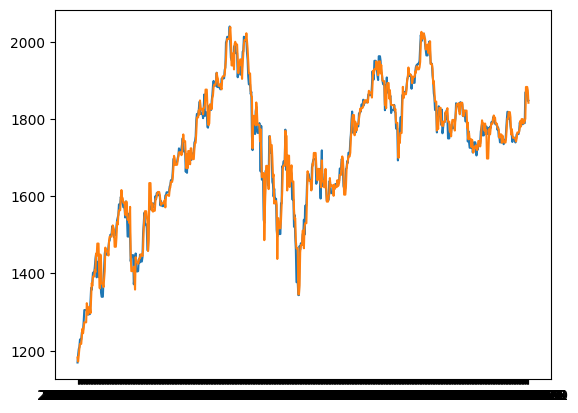

In [368]:
x_val = stocks['close_value']

y_val = stocks['day_date']
plt.plot(y_val, x_val)
plt.plot(stocks['open_value'])

In [1012]:
features = ['sentiment', 'amount']
# features = 'sentiment'
target = [ 'close_value' ]

In [1013]:
X_train, X_test, y_train, y_test = train_test_split(st_scaled[features], st_scaled[target], test_size=0.2, random_state=0)
# 0.1 --> 88%
# 0.3 --> 79%


In [1072]:
print(X_train)

      sentiment    amount
227    0.434339  0.032826
1097   0.565730  0.129715
997    0.398132  0.176780
1538   0.561902  0.432690
1185   0.542941  0.722453
...         ...       ...
835    0.643243  0.092767
1216   0.591216  0.254547
1653   0.701744  0.185581
559    0.719151  0.049577
684    0.763170  0.087116

[1460 rows x 2 columns]


In [1074]:
for col in X_train:
    if X_train[col].std() == 0:
        print('Yes')
    else:
        print('nO')

nO
nO


In [1108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, mean_absolute_error, mean_squared_error
regressor = RandomForestRegressor(n_estimators = 10, random_state = 50)
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test, y_test)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# print(y_pred)
print(f"The accuracy of the model is {round(accuracy,3)*100} %")
print(f"The MAE training model is {round(mae_train,3)*100} %")
print(f"The MAE testing model is {round(mae_test,3)*100} %")
print(f"The MSE training model is {round(mse_train,3)*100} %")
print(f"The MSE testing model is {round(mse_test,3)*100} %")
confusion_matrix(y_test, y_pred_test)

The accuracy of the model is 66.9 %
The MAE training model is 4.6 %
The MAE testing model is 11.899999999999999 %
The MSE training model is 0.5 %
The MSE testing model is 3.1 %


/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/3869951602.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ValueError: continuous is not supported

In [1102]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred_test)    # initialise a matrix full with zeros
y_pred_classes[y_pred_test > cutoff] = 1  
y_test_classes = np.zeros_like(y_pred_test)
y_test_classes[y_test > cutoff] = 1
confusion_matrix(y_test_classes, y_pred_classes)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [1096]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_pred))
# mape = np.mean(np.abs((regressor - y_pred) / np.abs(regressor)))
# print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))



The accuracy of the model is 66.9 %


ValueError: Found input variables with inconsistent numbers of samples: [1460, 365]

In [1086]:
# Predicting the target values of the test set
from sklearn.metrics import mean_squared_error


y_pred = regressor.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)
print('Indicaticting a good model')


RMSE:  0.176
Indicaticting a good model


In [1091]:
print('Importance of features are:', regressor.feature_importances_)

Importance of features are: [0.13660279 0.86339721]


In [1094]:
plt.barh(['sentiment', 'amount'], regressor.feature_importances_)

<BarContainer object of 2 artists>

In [1088]:
from sklearn.metrics import classification_report, confusion_matrix



print(classification_report(y_test,y_pred))

ValueError: continuous is not supported

In [957]:
from sklearn.metrics import r2_score
r2_score(y_test, regressor.predict(X_test))


0.09090438207770968

In [1059]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.4327650890863681

In [1071]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel


sclf = GradientBoostingClassifier(n_estimators=200)
selector = sclf.fit(X_train, y_train)
fs = SelectFromModel(selector, prefit=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.metrics import recall_score


def evaluate_model(y_pred, probs,train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train,       train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
          print(f' {metric.capitalize()} 
                 Baseline: {round(baseline[metric], 2)} 
                 Test: {round(results[metric], 2)} 
                 Train: {round(train_results[metric], 2)}')
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();
evaluate_model(y_pred,probs,train_predictions,train_probs)


In [1067]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(regressor, X_test, y_test, ax=ax, alpha=0.8)


ValueError: Expected 'estimator' to be a binary classifier, but got RandomForestRegressor

In [697]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [726]:
print(model.coef_)

[-1.82097269e+02 -2.55137653e-05  7.74520684e-02]


In [727]:
print(model.intercept_)

1899.0416393601872


score = 1899*
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [737]:
print(len(y_test))
print(len(X_test))
print(len(X_train))
print(len(y_train))

73
73
656
656


In [743]:
print(X_train)

     sentiment   volume  Price Diff
502   0.370079  4736618        0.00
386   0.375224  6402655      -64.03
497   0.356013  5783410      -67.30
212   0.359633  4139144       19.73
246   0.498575  5703128       26.80
..         ...      ...         ...
708   0.540541  2515644      -10.30
193   0.316923  4381802       16.41
630   0.324675  3139142       -8.86
560   0.366667  2981343        9.99
685   0.356688  3931141        0.00

[583 rows x 3 columns]


In [749]:
y_pred = model.predict(X_test)

In [752]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*10
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 0.80


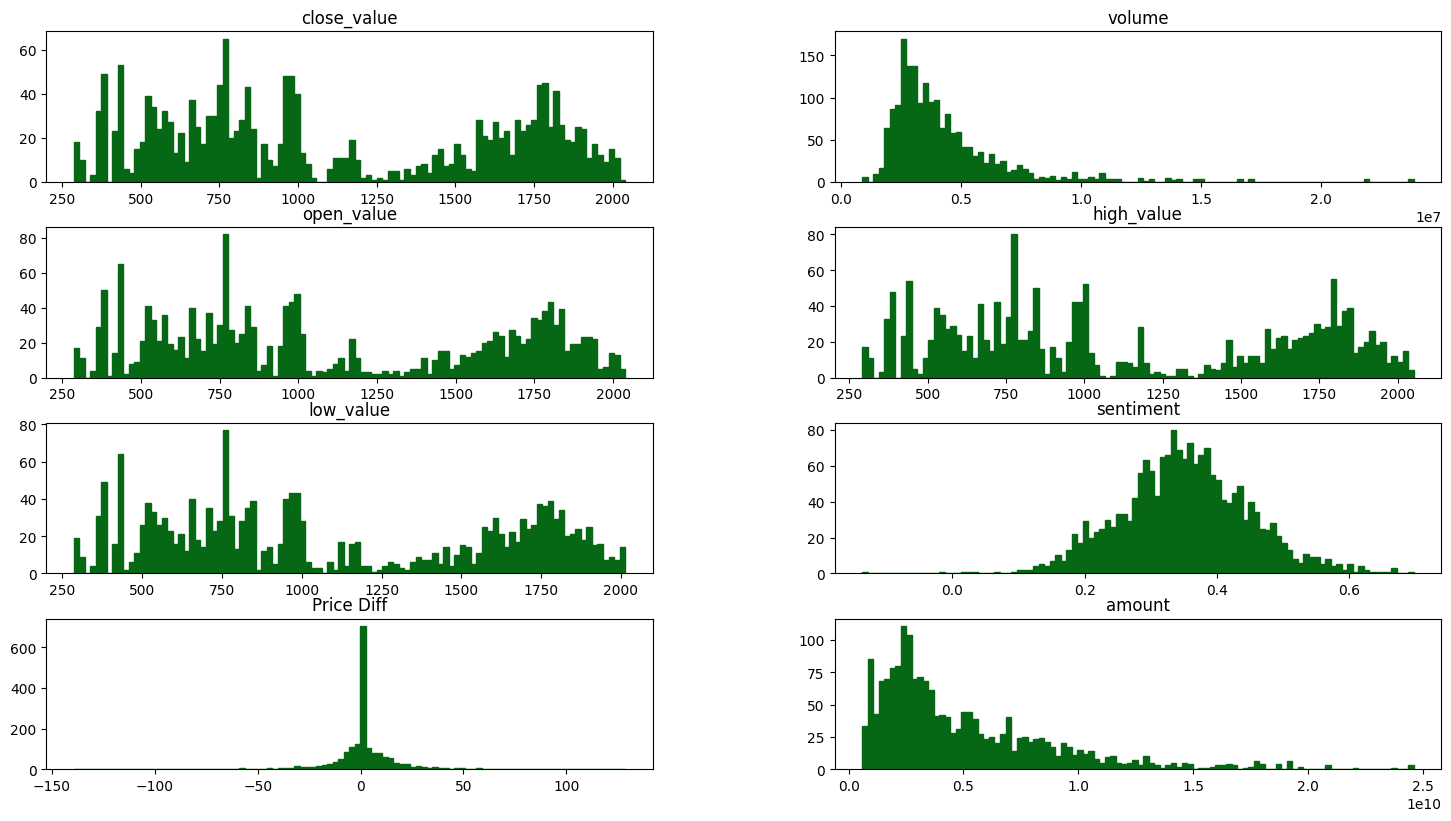

In [1022]:
stock_col = (stocks.columns)
stocks[stock_col].hist(stacked=False, bins=100, figsize=(18,35), layout=(14,2), color= "#066715", ec="#066715", grid=False);

In [692]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

ValueError: Found input variables with inconsistent numbers of samples: [219, 110]

In [87]:
print(model.intercept_)

8.340584231695175


In [88]:
print(model.coef_)

[ 0.97883752 52.95296953]


In [86]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined

/var/folders/f0/zf6fxcgs5t778nd1ml7j0xlr0000gn/T/ipykernel_1361/3487781266.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



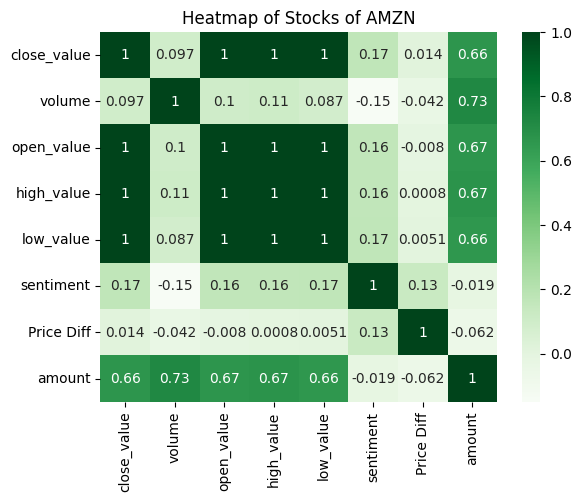

In [1016]:
correlations = stocks.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True, cmap="Greens").set(title='Heatmap of Stocks of AMZN');

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std

In [114]:
print(stocks['open_value'])

0      1182.35
1      1172.00
2      1188.30
3      1205.00
4      1217.51
        ...   
361    1473.35
362    1473.35
363    1473.35
364    1510.80
365    1510.80
Name: open_value, Length: 366, dtype: float64


In [119]:
X = stocks[['open_value']]
Y = stocks['close_value']
cv = KFold(n_splits=10, random_state=1, shuffle=True)
models = LinearRegression()
scores = cross_val_score(models, X, Y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: -22.601 (3.641)
